In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LOG_FILE0 = 'checkpoints/worse_log.txt'
LOG_FILE1 = 'checkpoints/vit_new_params/log.txt'
LOG_FILE2 = 'checkpoints/vit_new_params_incr_lr/log.txt'
LOG_FILE3 = 'checkpoints/vit_new_params_incr_lr_freeze/log.txt'
LOG_FILE4 = 'checkpoints/vit_new_params_2/log.txt'
LOG_FILE5 = 'checkpoints/vit_test_noclip/log.txt'


def get_logs(log_file):
    with open(log_file, 'r') as f:
        logs = f.readlines()
        logs = list(map(eval, logs))
        logs = pd.DataFrame(logs)
    return logs
    
logs0 = get_logs(LOG_FILE0)
logs1 = get_logs(LOG_FILE1)
logs2 = get_logs(LOG_FILE2)
logs3 = get_logs(LOG_FILE3)
logs4 = get_logs(LOG_FILE4)
logs5 = get_logs(LOG_FILE5)

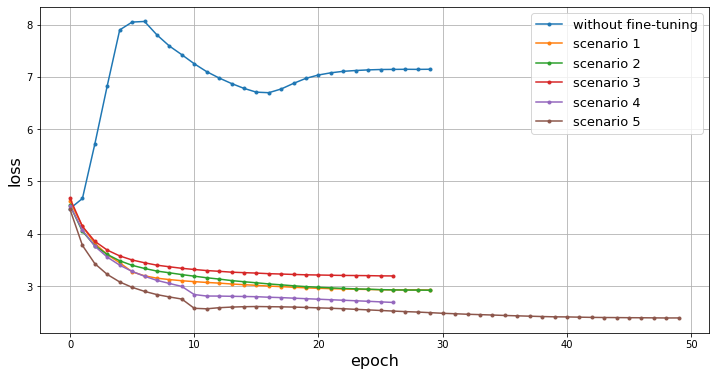

In [3]:
# fig, ax = plt.subplots(figsize=(12, 6))
# plt.plot(range(1,31), logs0['train_loss'], '.-', label='default hyperparameters')
# plt.plot(range(1,31), logs5['train_loss'][:30], '.-', label='tuned hyperparameters')

logs0['train_loss'].plot(style='.-', label='without fine-tuning', figsize=(12, 6))
logs1['train_loss'].plot(style='.-', label='scenario 1')
logs2['train_loss'].plot(style='.-',label='scenario 2')
logs3['train_loss'].plot(style='.-',label='scenario 3')
logs4['train_loss'].plot(style='.-',label='scenario 4')
logs5['train_loss'].plot(style='.-',label='scenario 5')


plt.xlabel('epoch', size=16)
plt.ylabel('loss', size=16);
plt.grid()
plt.legend(fontsize=13);
# plt.savefig('loss.png', dpi=800)

In [4]:
SLURM_FILE1 = 'slurm/slurm-train_dino.new_params.out'
SLURM_FILE2 = 'slurm/slurm-train_dino.30237751.out'
SLURM_FILE3 = 'slurm/slurm-train_dino.30243461.out'
SLURM_FILE4 = 'slurm/slurm-train_dino.30272817.out'
SLURM_FILE5 = 'slurm/slurm-train_dino.30273019.out'


def get_slurm(slurm_file):
    with open(slurm_file, 'r') as f:
        slurm = f.readlines()
        slurm = list(filter(lambda s: 'eta:' in s, slurm))
    slurm = list(map(lambda sl: float(re.findall('loss: ([\d.]+)', sl)[0]), slurm))
    return slurm

slurm1 = get_slurm(SLURM_FILE1)
slurm2 = get_slurm(SLURM_FILE2)
slurm3 = get_slurm(SLURM_FILE3)
slurm4 = get_slurm(SLURM_FILE4)
slurm5 = get_slurm(SLURM_FILE5)

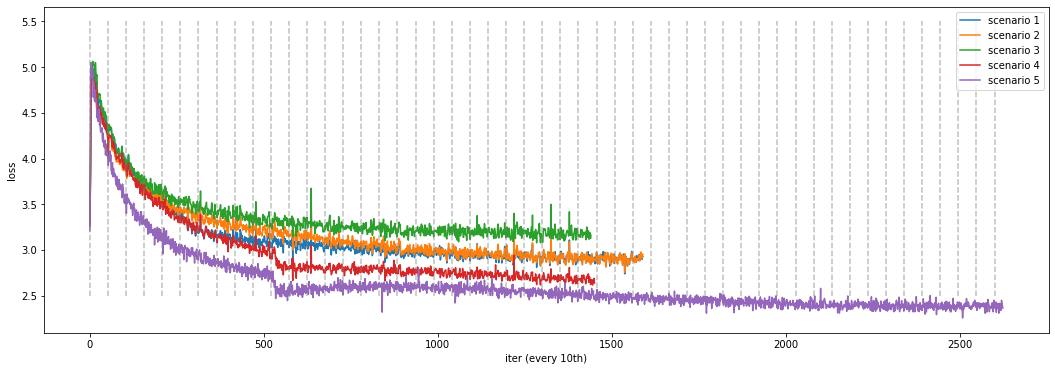

In [5]:
iters = 520
log_every = 10

fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(slurm1, label='scenario 1')
plt.plot(slurm2, label='scenario 2')
plt.plot(slurm3, label='scenario 3')
plt.plot(slurm4, label='scenario 4')
plt.plot(slurm5[::2], label='scenario 5')


for i in range(0, len(slurm5)//2, iters//log_every):
    plt.vlines(i, 2.5, 5.5, linestyle='--', color='grey', alpha=0.5)

plt.xlabel('iter (every 10th)')
plt.ylabel('loss')
plt.legend();